In [20]:
import tensorflow as tf
from tensorflow.keras import models , layers
import matplotlib.pyplot as plt

In [46]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS=50

In [22]:
print(IMAGE_SIZE)

256


In [23]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/Mitali Jadhav/Desktop/potato-disease/PlantVillage" ,
    shuffle = True ,
    image_size = (IMAGE_SIZE,IMAGE_SIZE) ,
    batch_size = BATCH_SIZE 
)

Found 2152 files belonging to 2 classes.


In [25]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___healthy']

In [26]:
len(dataset)

68

In [27]:
for image_batch , label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0]


In [29]:
print(image_batch[0].numpy())

[[[182. 185. 202.]
  [182. 185. 202.]
  [172. 175. 192.]
  ...
  [104. 101. 120.]
  [105. 102. 121.]
  [143. 140. 159.]]

 [[171. 174. 191.]
  [173. 176. 193.]
  [166. 169. 186.]
  ...
  [107. 104. 123.]
  [124. 121. 140.]
  [111. 108. 127.]]

 [[162. 165. 182.]
  [166. 169. 186.]
  [161. 164. 181.]
  ...
  [103. 100. 119.]
  [123. 120. 139.]
  [118. 115. 134.]]

 ...

 [[183. 185. 198.]
  [179. 181. 194.]
  [174. 176. 189.]
  ...
  [113. 109. 123.]
  [119. 115. 129.]
  [130. 126. 140.]]

 [[180. 182. 195.]
  [179. 181. 194.]
  [177. 179. 192.]
  ...
  [129. 125. 139.]
  [111. 107. 121.]
  [113. 109. 123.]]

 [[173. 175. 188.]
  [178. 180. 193.]
  [183. 185. 198.]
  ...
  [130. 126. 140.]
  [112. 108. 122.]
  [ 81.  77.  91.]]]


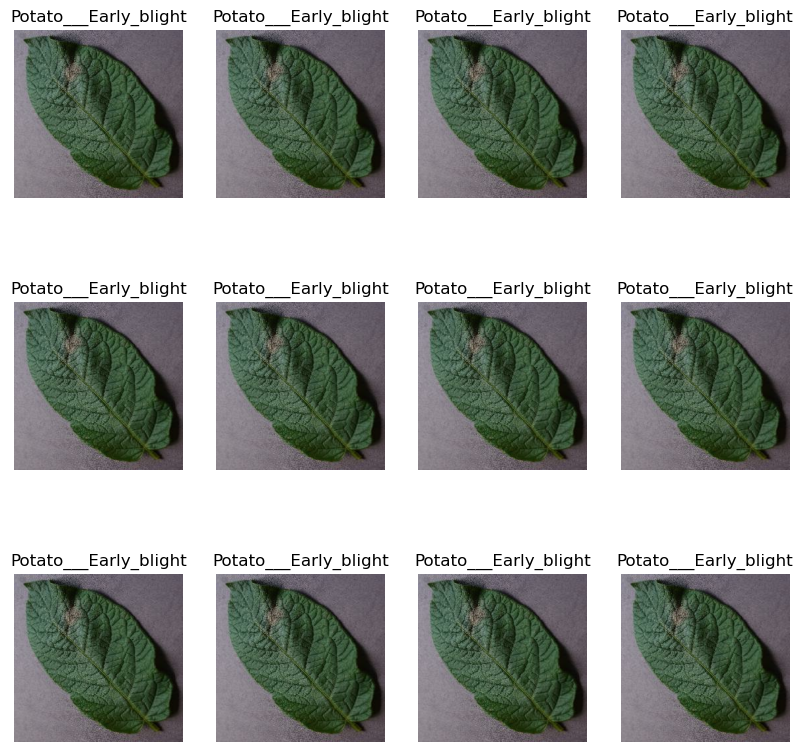

In [35]:
plt.figure(figsize = (10,10))
for image_batch , label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)    
        plt.imshow(image_batch[0].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [36]:
train_ds = dataset.take(54)
len(train_ds)

54

In [37]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [38]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [39]:
actual_test_ds = test_ds.skip(6)
len(actual_test_ds)

8

In [40]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
actual_test_ds = actual_test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [52]:
from tensorflow.keras import layers
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [53]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [64]:
from tensorflow.keras import layers,models

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape = (32,256,256,3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
                           ])
model.build(input_shape)

In [65]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_5 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_41 (MaxPooling2D)      │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [67]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 38s 553ms/step - accuracy: 0.9150 - loss: 0.4273 - val_accuracy: 0.9271 - val_loss: 0.2199
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 33s 607ms/step - accuracy: 0.9381 - loss: 0.1620 - val_accuracy: 0.9792 - val_loss: 0.0717
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 36s 674ms/step - accuracy: 0.9742 - loss: 0.0775 - val_accuracy: 0.9844 - val_loss: 0.0611
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 34s 629ms/step - accuracy: 0.9799 - loss: 0.0563 - val_accuracy: 0.9948 - val_loss: 0.0277
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 35s 644ms/step - accuracy: 0.9807 - loss: 0.0463 - val_accuracy: 0.9896 - val_loss: 0.0241
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 33s 617ms/step - accuracy: 0.9822 - loss: 0.0399 - val_accuracy: 0.9896 - val_loss: 0.0308
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 33s 618ms/step - accuracy: 0.9848 - loss: 0.0351 - val_accuracy: 0.9792 - val_loss: 0.0360
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 33s 617ms/step - accuracy: 0.9880 - loss: 0.0300 - val_accu

In [68]:
scores = model.evaluate(actual_test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 194ms/step - accuracy: 0.9899 - loss: 0.0497


In [69]:
scores

[0.049788378179073334, 0.9870689511299133]

In [70]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [71]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [72]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

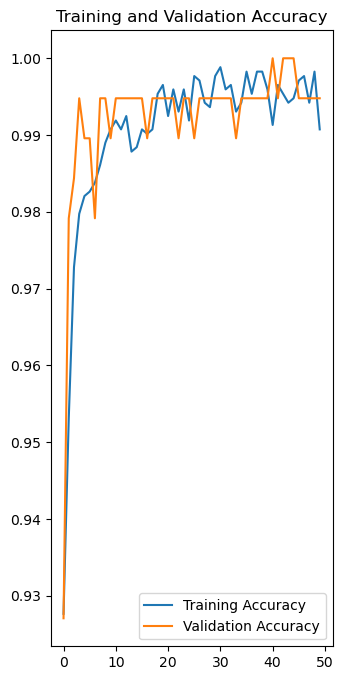

In [73]:
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS) , acc , label = "Training Accuracy")
plt.plot(range(EPOCHS) , val_acc , label = "Validation Accuracy")
plt.legend(loc = 'lower right')
plt.title("Training and Validation Accuracy")

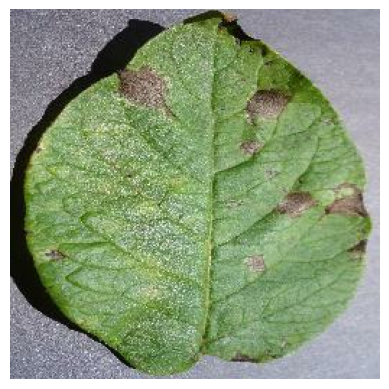

In [75]:
for images_batch, labels_batch in actual_test_ds.take(1):
    plt.imshow(images_batch[0].numpy().astype('uint8'))
    plt.axis("off")

First image to predict
Actual Label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
Predicted Label: Potato___Early_blight


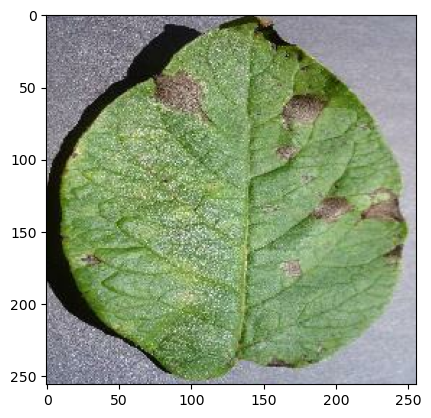

In [79]:
import numpy as np
for images_batch, labels_batch in actual_test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual Label:", class_names[first_label])
    batch_prediction = model.predict(images_batch)
    print("Predicted Label:", class_names[np.argmax(batch_prediction[0])])

In [80]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])) , 2)
    return predicted_class , confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


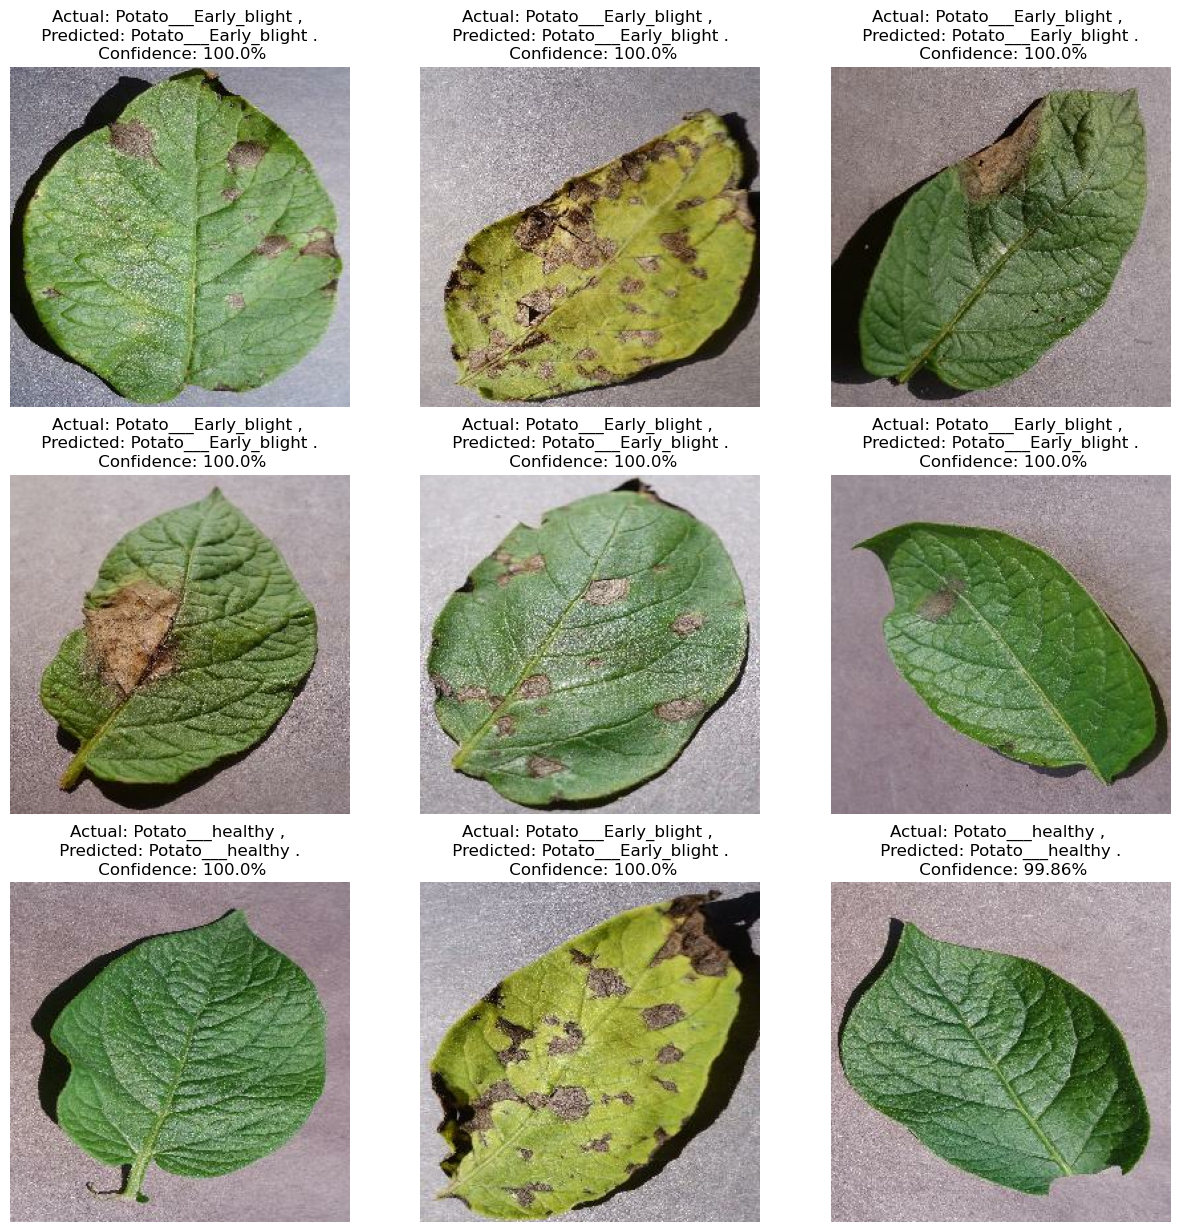

In [81]:
plt.figure(figsize = (15,15))
for images , labels in actual_test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class , confidence = predict(model , images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class} , \n Predicted: {predicted_class} . \n Confidence: {confidence}%")
        plt.axis("off")